# Currency

In [23]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import os
data_dir = './data/currency'

In [48]:
x = np.loadtxt(os.path.join(data_dir, 'currency.txt'), skiprows=1)[:,1:].T
# x = np.sign(np.diff(x, axis=1)).astype(int)
x = np.array([xi > xi.mean() for xi in x]).astype(int)
np.unique(x)

array([0, 1])

In [49]:
n, l = x.shape
m = [len(np.unique(xi)) for xi in x]
n, l, m

(11, 4600, [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

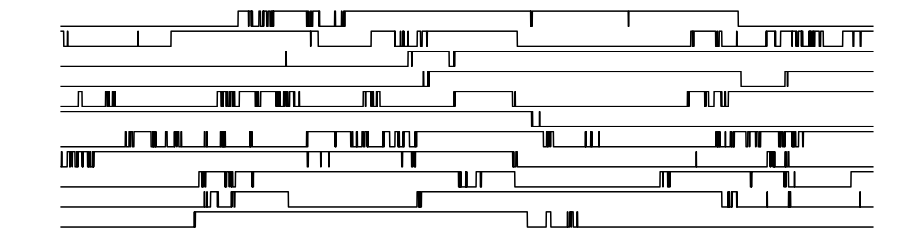

In [50]:
fig, ax = plt.subplots(n, 1, figsize=(16,4))
for i in range(n):
    ax[i].plot(x[i], 'k-')
    ax[i].axis('off')

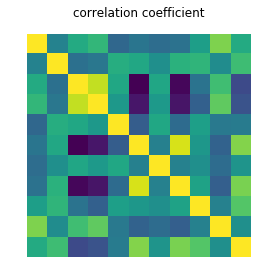

In [51]:
plt.matshow(np.corrcoef(x))
plt.axis('off')
plt.title('correlation coefficient')
plt.show()

In [52]:
import fem
x1, x2 = x[:, :-1], x[:, 1:]
degs, iters = [1], 20
par_fit, disc = fem.fit.fit(x1, x2, degs=degs, iters=iters)

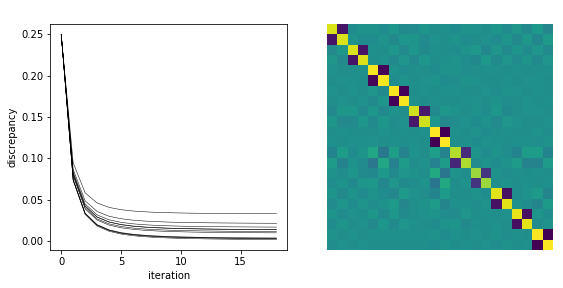

In [53]:
fig, ax = plt.subplots(1, 2, figsize=(8,4))

for d in disc:
    ax[0].plot(d, 'k-', lw=0.5)
ax[0].set_xlabel('iteration')
ax[0].set_ylabel('discrepancy')
    
ax[1].matshow(par_fit[1])
ax[1].axis('off')
    
plt.tight_layout()
plt.show()